In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import cv2
%matplotlib inline

In [2]:
ls 'Donald Tusk Cropped'/

008b9302d7.jpg* 2e97823330.jpg* 6489993103.jpg* 91a021b503.jpg* be25ade83d.jpg*
02d5e49f0b.jpg* 2ef8c691b6.jpg* 6c3e2d5ad5.jpg* 926d69a34a.jpg* c338cab40a.jpg*
04bafd8bc9.jpg* 30d26d8b88.jpg* 6caef06b8a.jpg* 928f3eb756.jpg* c43483879f.jpg*
05e48097ea.jpg* 32160404db.jpg* 6dd4acdd32.jpg* 9459c5c9d5.jpg* c44682f2f4.jpg*
0694eefc1c.jpg* 334140f26a.jpg* 6e152a846d.jpg* 954b854f7f.jpg* c5d6b5ae8f.jpg*
07c968846a.jpg* 38120bb8d1.jpg* 6e68dba278.jpg* 96ce890b24.jpg* c91e0801d9.jpg*
09302d7670.jpg* 38c9e7f0c2.jpg* 6ef5597adb.jpg* 97a93c9fc3.jpg* c94079aa7c.jpg*
0be6a7820d.jpg* 40711ce05a.jpg* 703fd107bf.jpg* 9890be4159.jpg* cc8df47866.jpg*
0bfd1ce043.jpg* 42391c1b48.jpg* 747e2982b4.jpg* 9caa938970.jpg* cd0e360e93.jpg*
0f2dd4b196.jpg* 448636e149.jpg* 75261eea0a.jpg* 9f6c2a757e.jpg* ce2ddf408d.jpg*
10031fdd72.jpg* 45d1b940c5.jpg* 75629a911b.jpg* a0068ff791.jpg* d177df88df.jpg*
10c53edece.jpg* 476b7e4756.jpg* 76109ee8b4.jpg* a057d861f6.jpg* d451e97c13.jpg*
11f01d09a3.jpg* 49ad1252d9.jpg* 7858678b

In [2]:
mean = pickle.load(open('./model/mean_preprocess.pickle','rb'))
model_svm = pickle.load(open('./model/model_svm.pickle','rb'))
model_pca = pickle.load(open('./model/pca_50.pickle','rb'))

In [10]:
politician_pre = ['Bosak','Tusk']
font = cv2.FONT_HERSHEY_SIMPLEX

In [4]:
mean.shape

(14400,)

In [22]:
#test data

def pipeline_model(img, color='bgr'):
    color = 'bgr'
#to gray
    if color == 'bgr':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#resize image
    if gray.shape[1] > 100:
        gray_resize = cv2.resize(gray,(120,120), cv2.INTER_AREA)
    else:
        gray_resize = cv2.resize(gray,(120,120), cv2.INTER_CUBIC)
#flattening
    gray_reshape = gray_resize.reshape(1,14400)
#subtract with mean

    gray_mean = gray_reshape - mean
#get eigne image
    eigen_image = model_pca.transform(gray_mean)
#pass to ML model (SVM)
    results = model_svm.predict_proba(eigen_image)[0]


    predict = results.argmax() #0 or 1
    score = results[predict]
    print(score)
    if score >=0.6:
        return 'Tusk'
    else:
        return 'Bosak'
#cv2.putText(img,font,1,(0,255,0),2)

0.9999998999999902


'Tusk'

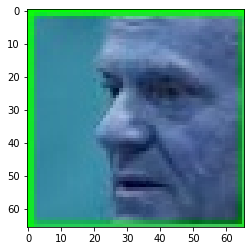

In [23]:
test_data_path = './Donald Tusk Cropped/6caef06b8a.jpg'

#read image
img = cv2.imread(test_data_path)
plt.imshow(img)
pipeline_model(img)